 # importing libaries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score


In [5]:
# IN the question we ahve splitted the data into training and testing
data_train=pd.read_csv("SalaryData_Train(1) (1).csv")

data_train.head()


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
data_test=pd.read_csv("SalaryData_Test(1).csv")
data_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


# EDA and EXPLORING THE DATA

In [7]:
data_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [8]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


<Axes: >

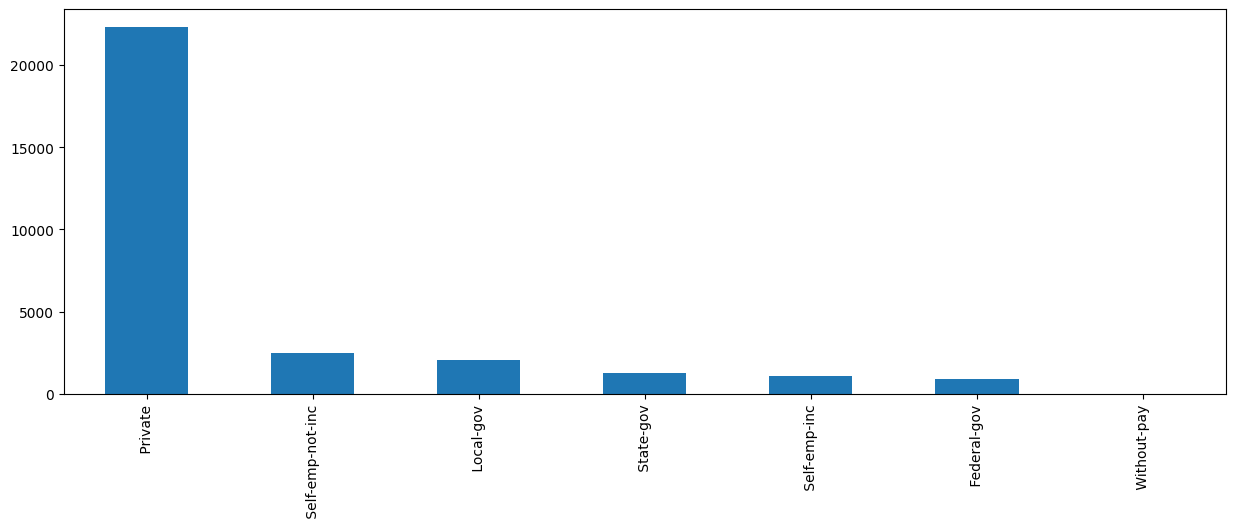

In [9]:
plt.figure(figsize=(15,5))
data_train.workclass.value_counts().plot.bar()

<Axes: >

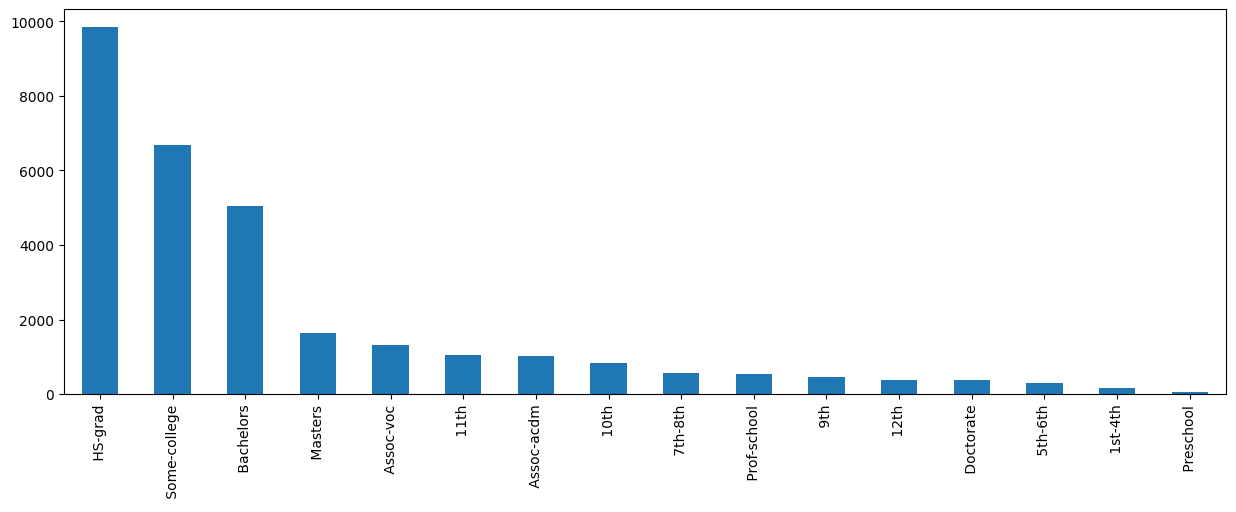

In [10]:
plt.figure(figsize=(15,5))
data_train.education.value_counts().plot.bar()

<Axes: >

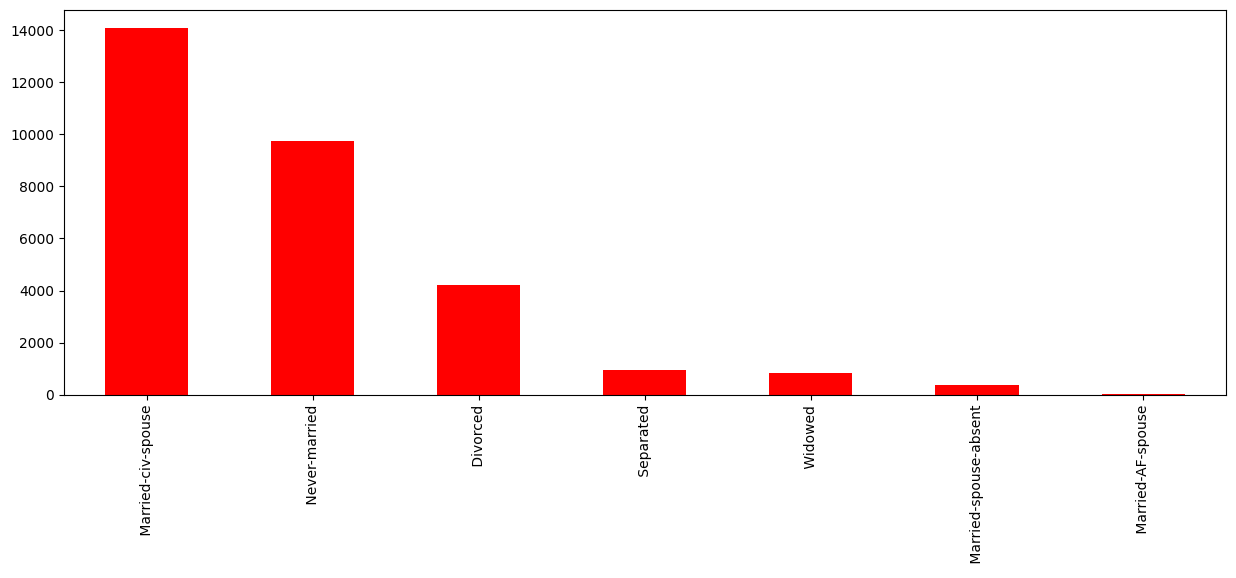

In [11]:
plt.figure(figsize=(15,5))
data_train.maritalstatus.value_counts().plot.bar(color='red')

<Axes: >

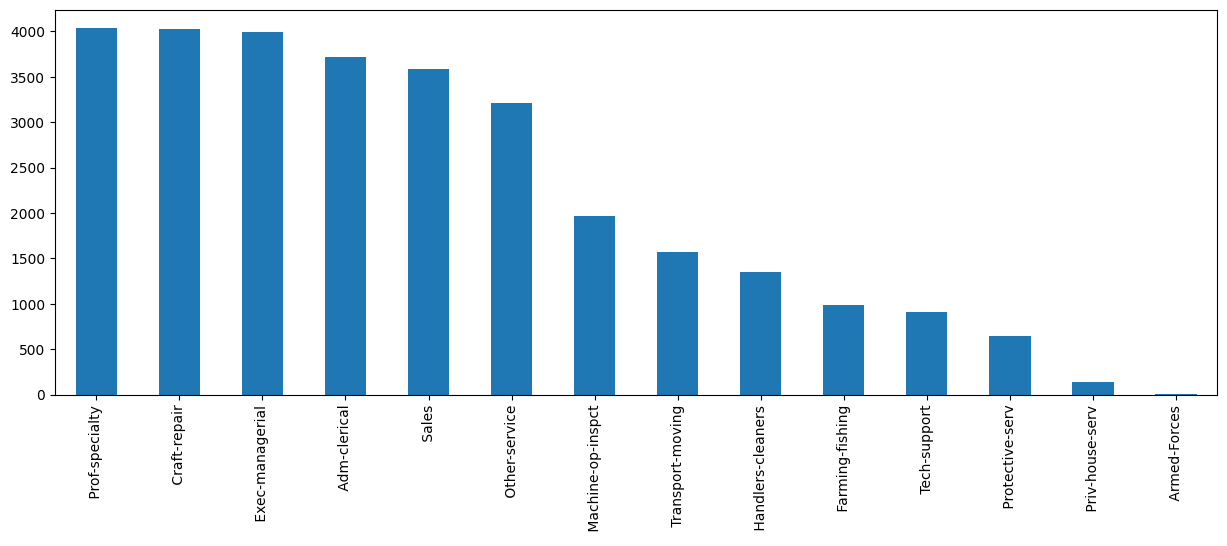

In [12]:
plt.figure(figsize=(15,5))
data_train.occupation.value_counts().plot.bar()

<Axes: >

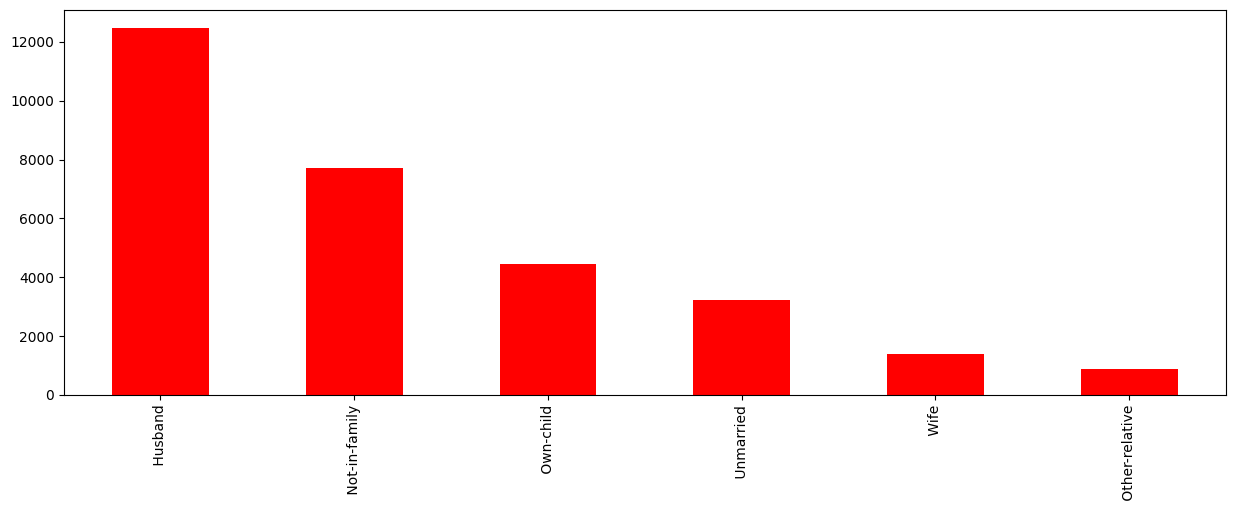

In [13]:
plt.figure(figsize=(15,5))
data_train.relationship.value_counts().plot.bar(color='red')

<Axes: >

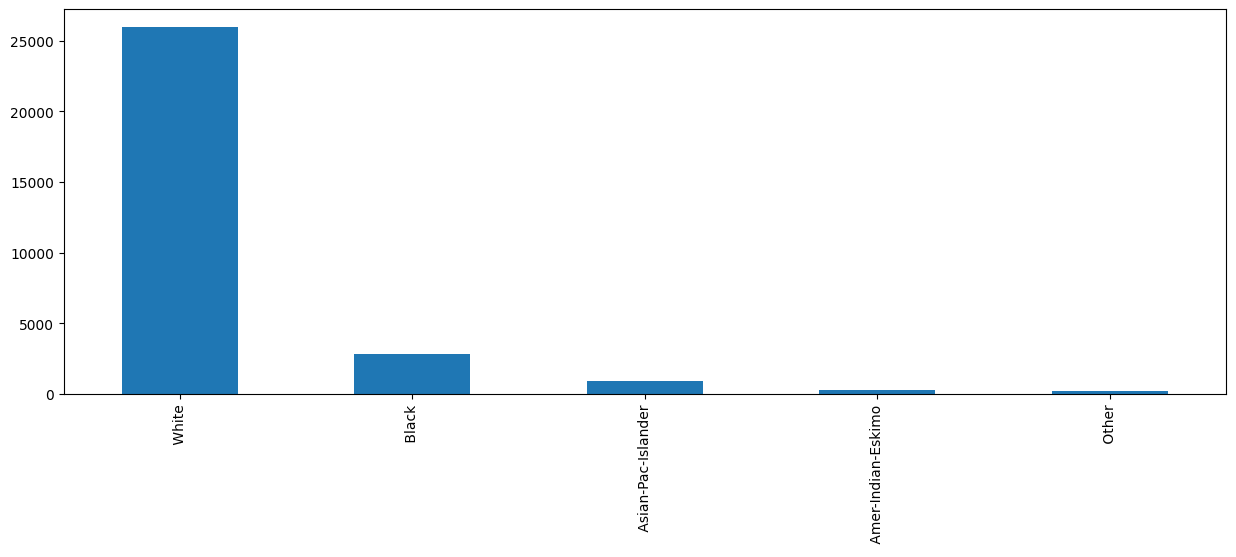

In [14]:
plt.figure(figsize=(15,5))
data_train.race.value_counts().plot.bar()

<Axes: >

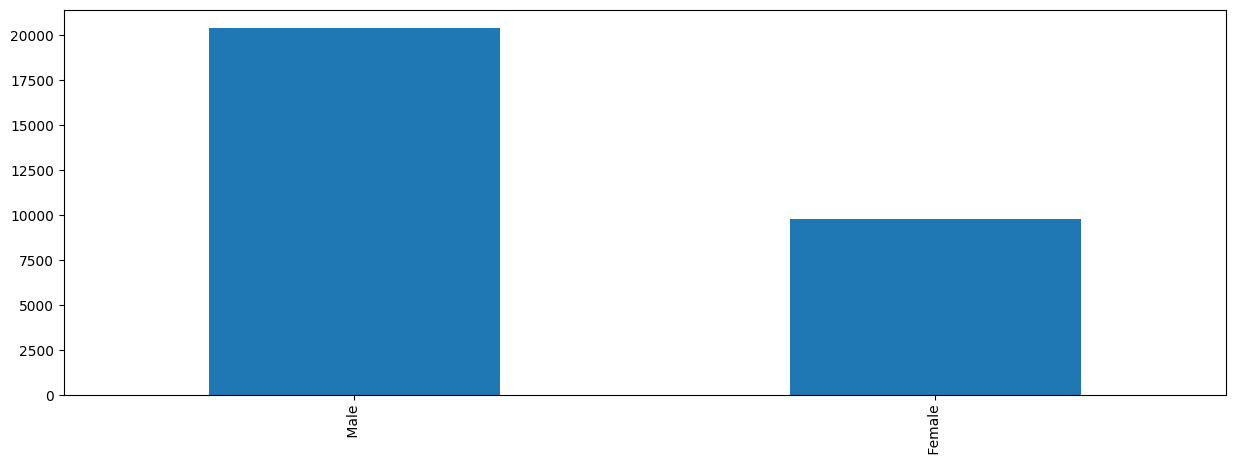

In [15]:
plt.figure(figsize=(15,5))
data_train.sex.value_counts().plot.bar()

<Axes: >

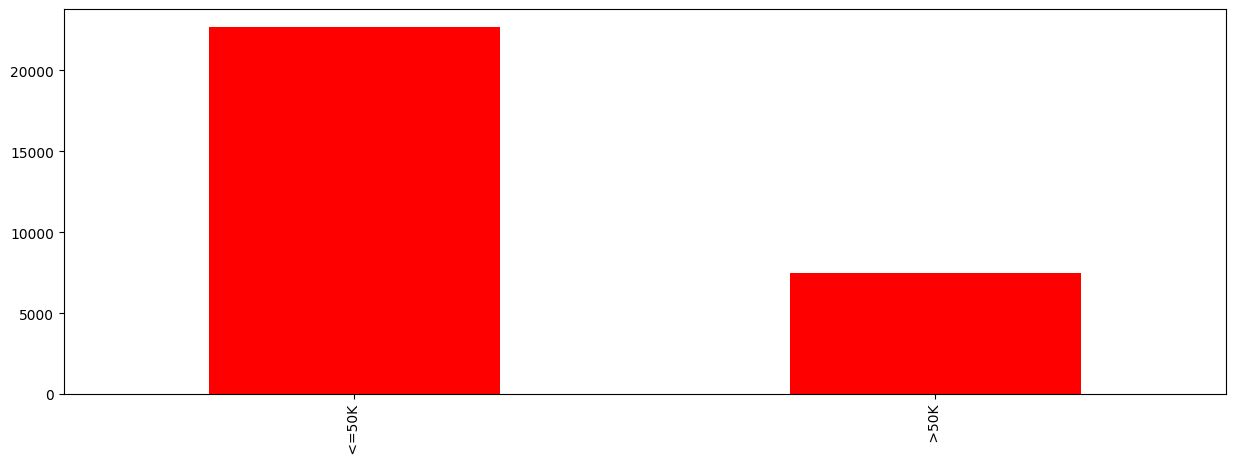

In [16]:
plt.figure(figsize=(15,5))
data_train.Salary.value_counts().plot.bar(color='red')

In [17]:
train1 = data_train.iloc[:,0:13]
train1=pd.get_dummies(train1)
train1

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,12,0,0,38,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30157,40,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30158,58,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30159,22,9,0,0,20,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [18]:
test1=data_test.iloc[0:,0:13]
test1=pd.get_dummies(test1)
test1

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,25,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,9,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,12,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,10,7688,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,34,6,0,0,30,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
15056,39,13,0,0,36,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
15057,38,13,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
15058,44,13,5455,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


# as we have many coloums we can use PCA

In [19]:
# we need to standize or normailze the data for PCA
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(train1)
train_norm=sc.transform(train1)
train_norm


array([[ 0.04277892,  1.12889813,  0.14608503, ...,  0.31081205,
        -0.04611353, -0.0230384 ],
       [ 0.88026081,  1.12889813, -0.14744712, ...,  0.31081205,
        -0.04611353, -0.0230384 ],
       [-0.0333558 , -0.4397325 , -0.14744712, ...,  0.31081205,
        -0.04611353, -0.0230384 ],
       ...,
       [ 1.48933854, -0.4397325 , -0.14744712, ...,  0.31081205,
        -0.04611353, -0.0230384 ],
       [-1.25151126, -0.4397325 , -0.14744712, ...,  0.31081205,
        -0.04611353, -0.0230384 ],
       [ 1.03253024, -0.4397325 ,  1.88108414, ...,  0.31081205,
        -0.04611353, -0.0230384 ]])

In [20]:
# same for the test data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(test1)
test_norm=sc.transform(test1)
test_norm

array([[-1.02900513, -1.2165628 , -0.14543845, ...,  0.30373366,
        -0.03554172, -0.02156441],
       [-0.05742253, -0.43489824, -0.14543845, ...,  0.30373366,
        -0.03554172, -0.02156441],
       [-0.80479376,  0.73759862, -0.14543845, ...,  0.30373366,
        -0.03554172, -0.02156441],
       ...,
       [-0.05742253,  1.1284309 , -0.14543845, ...,  0.30373366,
        -0.03554172, -0.02156441],
       [ 0.39100021,  1.1284309 ,  0.562734  , ...,  0.30373366,
        -0.03554172, -0.02156441],
       [-0.2816339 ,  1.1284309 , -0.14543845, ...,  0.30373366,
        -0.03554172, -0.02156441]])

In [21]:
# applying pca
from sklearn.decomposition import PCA
train_pca=PCA(n_components=102)
train_pca_values=train_pca.fit_transform(train_norm)
train_pca_values

array([[-5.50838008e-01, -2.38164986e+00, -5.91921169e-01, ...,
         2.87723251e-15,  2.19662391e-15,  8.17917673e-16],
       [ 2.81915829e+00, -1.37085459e+00, -4.81126421e-02, ...,
        -6.23813736e-15,  2.04530860e-16, -1.44232212e-15],
       [-7.93831525e-01,  8.71803957e-01, -1.20213150e+00, ...,
         1.52055722e-15,  4.18745410e-18,  9.77649629e-16],
       ...,
       [-2.37835145e+00, -7.98690413e-01,  3.39105780e-01, ...,
        -1.04579167e-16,  5.78159386e-17,  9.14438509e-17],
       [-1.97547719e+00,  1.19305162e+00, -1.82899406e+00, ...,
        -2.06563445e-16, -2.15857137e-16,  3.71190244e-17],
       [ 7.62131786e-01, -1.77200870e+00,  5.36971989e-01, ...,
         6.98072435e-17, -1.75379815e-16,  1.03103946e-17]])

In [22]:
 # same for test data
from sklearn.decomposition import PCA
test_pca=PCA(n_components=102)
test_pca_values=test_pca.fit_transform(test_norm)
test_pca_values

array([[-2.24293780e+00,  2.60318091e+00, -3.27616503e-01, ...,
         1.44718340e-15,  2.24477824e-16,  1.28585354e-15],
       [ 2.22690391e+00,  1.59471521e+00, -7.32082794e-01, ...,
        -6.35934367e-15,  4.78552678e-15, -7.57019336e-16],
       [ 2.30704416e+00, -1.16883181e+00, -2.00521481e-01, ...,
         1.04093567e-15,  1.07917957e-16,  2.01137172e-15],
       ...,
       [ 2.39583218e+00, -1.46859740e+00, -2.09424792e-01, ...,
        -3.71974541e-17, -3.75578328e-17,  3.72060228e-17],
       [-1.14039506e+00, -1.03678137e+00,  2.58079490e+00, ...,
         5.07789892e-16,  6.78672956e-16,  1.34011070e-16],
       [ 3.38445120e+00, -1.95481575e+00, -1.72791531e-01, ...,
        -9.23147008e-17, -1.26721665e-17,  1.68530995e-17]])

In [23]:
# the amount of variance that each PCA explains is
var=train_pca.explained_variance_ratio_
var

array([4.47952203e-02, 3.03018755e-02, 2.56772664e-02, 2.30740938e-02,
       1.90544461e-02, 1.75159608e-02, 1.66112958e-02, 1.51765356e-02,
       1.40918479e-02, 1.37139289e-02, 1.30161578e-02, 1.27145892e-02,
       1.22845420e-02, 1.20633855e-02, 1.19277829e-02, 1.17776199e-02,
       1.15732784e-02, 1.14595050e-02, 1.12290572e-02, 1.10955712e-02,
       1.09763472e-02, 1.09664173e-02, 1.08013630e-02, 1.07163253e-02,
       1.06965233e-02, 1.06243926e-02, 1.05150466e-02, 1.04401201e-02,
       1.04195534e-02, 1.03772631e-02, 1.02585913e-02, 1.02518285e-02,
       1.02343018e-02, 1.02011311e-02, 1.01746044e-02, 1.00893885e-02,
       1.00693090e-02, 1.00007488e-02, 9.97967518e-03, 9.93621541e-03,
       9.91132587e-03, 9.87257873e-03, 9.85864172e-03, 9.85346688e-03,
       9.83507641e-03, 9.82654639e-03, 9.82141035e-03, 9.81950938e-03,
       9.81361594e-03, 9.80760489e-03, 9.80531422e-03, 9.80056163e-03,
       9.79178710e-03, 9.77352236e-03, 9.77198782e-03, 9.75826765e-03,
      

In [24]:
# Cumulative variance
var1=np.cumsum(np.round(var,decimals=4))
var1

array([0.0448, 0.0751, 0.1008, 0.1239, 0.143 , 0.1605, 0.1771, 0.1923,
       0.2064, 0.2201, 0.2331, 0.2458, 0.2581, 0.2702, 0.2821, 0.2939,
       0.3055, 0.317 , 0.3282, 0.3393, 0.3503, 0.3613, 0.3721, 0.3828,
       0.3935, 0.4041, 0.4146, 0.425 , 0.4354, 0.4458, 0.4561, 0.4664,
       0.4766, 0.4868, 0.497 , 0.5071, 0.5172, 0.5272, 0.5372, 0.5471,
       0.557 , 0.5669, 0.5768, 0.5867, 0.5965, 0.6063, 0.6161, 0.6259,
       0.6357, 0.6455, 0.6553, 0.6651, 0.6749, 0.6847, 0.6945, 0.7043,
       0.714 , 0.7237, 0.7334, 0.7431, 0.7528, 0.7624, 0.772 , 0.7816,
       0.7912, 0.8007, 0.8101, 0.8195, 0.8289, 0.8382, 0.8475, 0.8566,
       0.8657, 0.8747, 0.8836, 0.8924, 0.9011, 0.9097, 0.9182, 0.9266,
       0.9349, 0.9428, 0.9505, 0.9577, 0.9649, 0.9714, 0.9775, 0.9835,
       0.9888, 0.9936, 0.9979, 1.0003, 1.0005, 1.0005, 1.0005, 1.0005,
       1.0005, 1.0005, 1.0005, 1.0005, 1.0005, 1.0005])

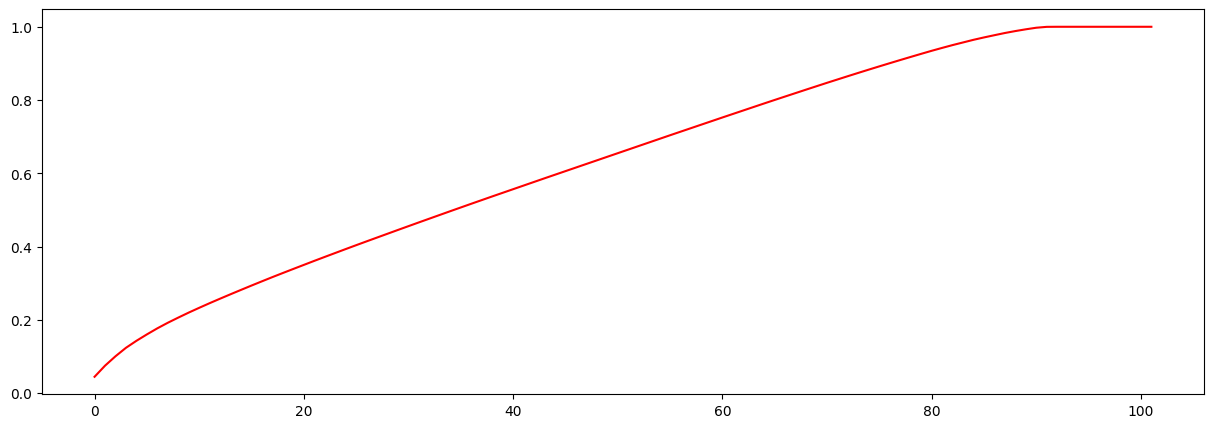

In [25]:
# variance plot for PCA
plt.figure(figsize=(15,5))
plt.plot(var1,color="red")

# Selecting first 90 PCAs out of total 102


In [26]:
finaltrain = pd.concat([pd.DataFrame(train_pca_values[:,0:90]),
                     data_train[['Salary']]], axis = 1)
finaltrain


,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,Salary
0,-0.550838,-2.381650,-0.591921,1.433211,0.340516,1.940931,-0.055056,0.515267,-0.603118,-1.349744,...,0.925827,0.366843,0.762292,0.955908,-0.431471,-0.253518,-0.090683,1.446239,0.537054,<=50K
1,2.819158,-1.370855,-0.048113,0.060772,0.148609,0.494097,0.971070,0.977166,-1.058340,1.543212,...,1.715245,-0.684681,0.173783,-1.120804,1.043838,-1.127099,0.538383,-0.179721,0.006457,<=50K
2,-0.793832,0.871804,-1.202131,-0.513685,0.452004,0.675599,-2.665003,0.041210,0.966047,-0.942719,...,0.666397,-0.126942,-0.368158,0.399572,0.094164,-0.001750,-0.622668,0.114582,0.079789,<=50K
3,0.732942,2.502494,0.763990,-0.149514,-3.056486,0.166519,0.140931,-2.430582,0.155941,1.066790,...,0.058897,0.409911,0.952768,0.193645,0.292208,0.033568,-0.226799,-0.779685,0.367130,<=50K
4,-1.070350,-1.638424,4.542395,0.260940,0.650488,-2.473710,2.483233,-2.795740,-0.249688,1.001833,...,-1.388747,0.857151,-1.132278,0.924125,0.087501,-0.409813,-0.711475,0.566080,-1.599465,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,-0.766825,-1.596732,-0.037113,-0.576608,0.331904,-3.490439,2.320920,-0.117277,-0.388185,-1.112954,...,-0.680328,0.177364,-0.265304,-0.170305,0.307492,-0.087299,-0.407937,1.072890,-0.389103,<=50K
30157,1.704432,1.785328,-0.594925,-0.692498,-0.411458,-1.251061,-0.505186,-0.513443,1.286209,-0.530841,...,0.603116,-0.279650,0.035936,0.532717,-0.070438,-0.160400,0.100112,-0.124855,0.253184,>50K
30158,-2.378351,-0.798690,0.339106,-4.067833,0.281604,-1.215646,-0.253538,1.090962,0.960431,0.065679,...,-1.205160,0.177494,0.668585,0.528450,0.580482,0.156868,-0.442096,0.753165,-0.657852,<=50K
30159,-1.975477,1.193052,-1.828994,1.598638,-0.633416,-0.187607,0.789310,0.860548,0.808205,-0.906124,...,1.329776,-0.312235,0.180269,-1.124998,0.500770,-0.047237,-0.227867,0.993340,-0.939524,<=50K


In [27]:
finaltest = pd.concat([pd.DataFrame(train_pca_values[:,0:90]),
                     data_test[['Salary']]], axis = 1)
finaltest

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,Salary
0,-0.550838,-2.381650,-0.591921,1.433211,0.340516,1.940931,-0.055056,0.515267,-0.603118,-1.349744,...,0.925827,0.366843,0.762292,0.955908,-0.431471,-0.253518,-0.090683,1.446239,0.537054,<=50K
1,2.819158,-1.370855,-0.048113,0.060772,0.148609,0.494097,0.971070,0.977166,-1.058340,1.543212,...,1.715245,-0.684681,0.173783,-1.120804,1.043838,-1.127099,0.538383,-0.179721,0.006457,<=50K
2,-0.793832,0.871804,-1.202131,-0.513685,0.452004,0.675599,-2.665003,0.041210,0.966047,-0.942719,...,0.666397,-0.126942,-0.368158,0.399572,0.094164,-0.001750,-0.622668,0.114582,0.079789,>50K
3,0.732942,2.502494,0.763990,-0.149514,-3.056486,0.166519,0.140931,-2.430582,0.155941,1.066790,...,0.058897,0.409911,0.952768,0.193645,0.292208,0.033568,-0.226799,-0.779685,0.367130,>50K
4,-1.070350,-1.638424,4.542395,0.260940,0.650488,-2.473710,2.483233,-2.795740,-0.249688,1.001833,...,-1.388747,0.857151,-1.132278,0.924125,0.087501,-0.409813,-0.711475,0.566080,-1.599465,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,-0.766825,-1.596732,-0.037113,-0.576608,0.331904,-3.490439,2.320920,-0.117277,-0.388185,-1.112954,...,-0.680328,0.177364,-0.265304,-0.170305,0.307492,-0.087299,-0.407937,1.072890,-0.389103,NaN
30157,1.704432,1.785328,-0.594925,-0.692498,-0.411458,-1.251061,-0.505186,-0.513443,1.286209,-0.530841,...,0.603116,-0.279650,0.035936,0.532717,-0.070438,-0.160400,0.100112,-0.124855,0.253184,NaN
30158,-2.378351,-0.798690,0.339106,-4.067833,0.281604,-1.215646,-0.253538,1.090962,0.960431,0.065679,...,-1.205160,0.177494,0.668585,0.528450,0.580482,0.156868,-0.442096,0.753165,-0.657852,NaN
30159,-1.975477,1.193052,-1.828994,1.598638,-0.633416,-0.187607,0.789310,0.860548,0.808205,-0.906124,...,1.329776,-0.312235,0.180269,-1.124998,0.500770,-0.047237,-0.227867,0.993340,-0.939524,NaN


In [28]:
#Since the training dataset is huge, we'll use some part of it for the training purpose, to reduce time consumed.
array = finaltrain.values
X = array[0:1000,0:90]
Y = array[0:1000,90]

#   Since the training and test datasets are separately given in the problem, so we'll use them separately for model validation


# SVM Classification
Let's use Grid search CV to find out best value for params



In [29]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [30]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[0.9,0.5,0.1],'C':[1,10,100] },
             {'kernel':['linear'],'C':[1,10,100]}]
gsv = GridSearchCV(clf,param_grid,cv=10,n_jobs=-1)
gsv.fit(X,Y)

gsv.best_params_ , gsv.best_score_

({'C': 10, 'kernel': 'linear'}, 0.8220000000000001)

In [31]:
#Since the testing dataset is huge, we'll use some part of it for the test purpose, to reduce the time consumed.
x = finaltest.values[0:1000,0:90]
y = finaltest.values[0:1000,90]

In [32]:
#SVM Clasification
clf = SVC(C=10, kernel='linear')
clf.fit(x,y)
results = clf.score(x,y)
print(np.round(results, 4))


0.758


# Now, let's try some Ensemble methods to see if we can further increase the accuracy of the model


# Trial-1: Bagging


In [33]:
# Bagged Decision Trees for Classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

seed = 7
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
model.fit(x,y)
results = model.score(x,y)
print(np.round(results, 4))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.993


# Trial-2: Random Forest


In [34]:
# Random Forest Classification

from sklearn.ensemble import RandomForestClassifier

num_trees = 100
max_features = 3
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
model.fit(x,y)
results = model.score(x,y)
print(np.round(results, 4))

0.993


# Trial-3: Boosting


In [35]:
# AdaBoost Classification

from sklearn.ensemble import AdaBoostClassifier
num_trees = 100
seed=7

model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
model.fit(x,y)
results = model.score(x,y)
print(np.round(results, 4))


0.87


# Trial-4: Stacking


In [38]:
# Stacking Ensemble for Classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [39]:
# create the sub models
estimators = []
model = LogisticRegression(max_iter=500)
estimators.append(('logistic', model))
model = DecisionTreeClassifier()
estimators.append(('cart', model))
model = SVC()
estimators.append(('svm', model))

# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(x,y)
results = ensemble.score(x,y)
print(np.round(results, 4))

0.775


In [40]:
# create the sub models
estimators = []
model = LogisticRegression(max_iter=500)
estimators.append(('logistic', model))
model = DecisionTreeClassifier()
estimators.append(('cart', model))
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
estimators.append(('Boosting', model))

# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(x,y)
results = ensemble.score(x,y)
print(np.round(results, 4))

0.877


# Hence, we can say that Bagging/Random Forest- any of them is equally best predicting model for this dataset